<a href="https://colab.research.google.com/github/Shkum/IT_STEP/blob/ML/module4/Practic_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Завдання 1

Перегляньте інформацію про доступні процесори, та виведіть про них інформацію

In [2]:
print(torch.cuda.is_available())  # True/False

if torch.cuda.is_available():
    print(torch.cuda.device_count())  # Кількість GPU
    print(torch.cuda.get_device_name(0))  # Назва першого GPU

tensor = torch.tensor([1, 2, 3])
print(tensor.device)  # CPU

False
cpu


# Завдання 2
Підключіть colab до процесора GPU, та знову виведіть інформацію про доступні процесори

In [2]:
print(torch.cuda.is_available())  # True/False

if torch.cuda.is_available():
    print(torch.cuda.device_count())  # Кількість GPU
    print(torch.cuda.get_device_name(0))  # Назва першого GPU

tensor = torch.tensor([1, 2, 3])
print(tensor.device)  # CPU

True
1
Tesla T4
cpu


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tensor = torch.tensor([1, 2, 3])
tensor = tensor.to(device)

tensor

tensor([1, 2, 3], device='cuda:0')

# Завдання 3
Створіть випадковий тензор розміру (2, 3). Виведіть інформацію про його:

* розмір
* тип даних
* процесор
* наявність градієнта

In [3]:
tensor = torch.randn(2, 3)

In [9]:
print(f'{tensor.size()=}', '\n')

print(f'{tensor.dtype=}', '\n')

print(f'{tensor.device=}', '\n')

print(f'{tensor.requires_grad=}', '\n')

tensor.size()=torch.Size([2, 3]) 

tensor.dtype=torch.float32 

tensor.device=device(type='cpu') 

tensor.requires_grad=False 



# Завдання 4

Створіть 2 тензора розміру 100. Використовуючи лише модуль `torch` обрахуйте середьню абсолютну похибку(mae) між ними. Виведіть результат як число

In [10]:
tensor1 = torch.rand(100)
tensor2 = torch.rand(100)

mae = torch.mean(torch.abs(tensor1 - tensor2))

print("Mean absolute error (MAE):", mae.item())

Mean absolute error (MAE): 0.32659995555877686


# Завдання 5

Створіть 3 випадкових тензора з розмірами:
* 32х28х28
* 16х28х28
* 64х28х28

Об'єднайте їх по першій розмірності. Результат має мати розмір 128х28х28

In [11]:
tensor1 = torch.rand(32, 28, 28)
tensor2 = torch.rand(16, 28, 28)
tensor3 = torch.rand(64, 28, 28)

result_tensor = torch.cat((tensor1, tensor2, tensor3), dim=0)

print("Result size:", result_tensor.size())

Result size: torch.Size([112, 28, 28])


# Завдання 6
Застосуйте метод градієнтного спуску для функції

In [12]:
def f(x):
  return x**2/3 + torch.sin(torch.pi*x)

In [19]:
x = torch.tensor(2.0, requires_grad=True)

# швидкість навчання
learning_rate = 1e-3

def gradient(x):

    for t in range(2000):
        # обчислюємо функцію яку потрібно мінімізувати
        loss = f(x)

        # обчислюємо всі потрібні градієнти
        loss.backward()

        # вивід значення функції
        if t % 100 == 0:
            print(f'loss={loss.item()}')

        with torch.no_grad():
            x -= learning_rate * x.grad

        # очищуємо пам'ять для повторного обчислення градієнтів
            x.grad = None

gradient(x)

loss=1.3333334922790527
loss=-0.01230710744857788
loss=-0.26274728775024414
loss=-0.2934073805809021
loss=-0.29722774028778076
loss=-0.29771924018859863
loss=-0.2977832555770874
loss=-0.29779165983200073
loss=-0.29779279232025146
loss=-0.297792911529541
loss=-0.29779303073883057
loss=-0.29779303073883057
loss=-0.2977929711341858
loss=-0.2977929711341858
loss=-0.2977929711341858
loss=-0.2977929711341858
loss=-0.2977929711341858
loss=-0.2977929711341858
loss=-0.2977929711341858
loss=-0.2977929711341858


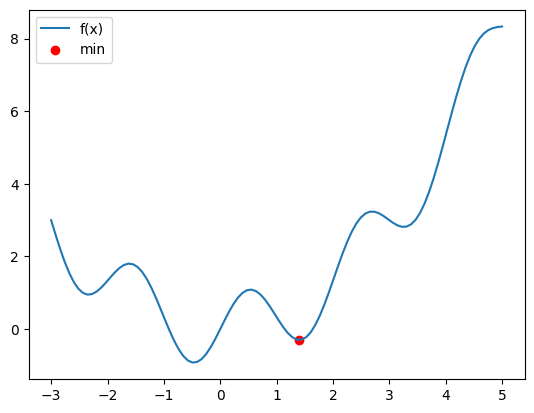

In [20]:
xs = torch.linspace(-3, 5, 100)
plt.plot(xs.cpu(), f(xs).cpu(), label='f(x)')
plt.scatter(x.item(), f(x).item(), c='red', label='min')
plt.legend()

# Завдання 7
Застосуйте метод градієнтного спуску для функції. Мінімум функції рівний 0

In [21]:
def f1(x, y):
  # функція Швефеля
  return  418.9829*2 - x*torch.sin(x.abs().sqrt()) - y*torch.sin(y.abs().sqrt())

def f2(x, y):
  # трьохгорбна функція
  return 2*x**2  - 1.05*x**4 + 1/6*x**6 + x*y  + y**2

def f3(x, y):
  # функція птах
  106.7645 + torch.sin(x)*torch.exp((1-torch.cos(y))**2) + torch.cos(y)*torch.exp((1-torch.sin(x))**2) + (x-y)**2

In [22]:
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

    # швидкість навчання
learning_rate = 1e-3

for t in range(2000):
    # обчислюємо функцію яку потрібно мінімізувати
    loss = f2(x, y)

    # обчислюємо всі потрібні градієнти
    loss.backward()

    # вивід значення функції
    if t % 100 == 0:
        print(f'loss={loss.item()}')

    with torch.no_grad():
        x -= learning_rate * x.grad

    # очищуємо пам'ять для повторного обчислення градієнтів
        x.grad = None

loss=16.866668701171875
loss=14.764642715454102
loss=14.156024932861328
loss=13.175064086914062
loss=11.33413314819336
loss=9.552299499511719
loss=8.62752628326416
loss=8.187703132629395
loss=7.9269256591796875
loss=7.718555450439453
loss=7.490306854248047
loss=7.144378185272217
loss=6.451656341552734
loss=5.253124237060547
loss=4.702069282531738
loss=4.671140670776367
loss=4.670618534088135
loss=4.67061185836792
loss=4.670612335205078
loss=4.67061185836792
